In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve

# 1. Load prepared data 
#  Logistic Regression requires scaled data. 
X_train = pd.read_parquet('X_train_tree_ready.parquet', engine='fastparquet')
X_test = pd.read_parquet('X_test_tree_ready.parquet', engine='fastparquet')

# Load targets (converting to 1D array)
y_train = pd.read_csv('y_train_tree_ready.csv').values.ravel()
y_test = pd.read_csv('y_test_tree_ready.csv').values.ravel()

print("Data loaded successfully:")
print(f"Train set shape: {X_train.shape}")
print(f"Test set shape : {X_test.shape}")

Data loaded successfully:
Train set shape: (1258858, 105)
Test set shape : (261278, 105)


In [2]:
# 2. Training the Logistic Regression Baseline
# max_iter=1000 ensures convergence for large datasets
# n_jobs=-1 uses all available CPU cores
model_lr = LogisticRegression(random_state=42, max_iter=1000, n_jobs=-1)

print("Training baseline model")
model_lr.fit(X_train, y_train)

print("Model trained")

Training baseline model
Model trained


In [3]:
# 3. Predictions & Metrics
# We predict classes (0 or 1) and probabilities (for ROC-AUC)
y_pred = model_lr.predict(X_test)
y_prob = model_lr.predict_proba(X_test)[:, 1] # Probability of Default

# 4. Performance Report
print("--- BASELINE PERFORMANCE REPORT ---")
print(classification_report(y_test, y_pred))

# Calculate ROC-AUC Score
auc_score = roc_auc_score(y_test, y_prob)
print(f"ROC-AUC Score: {auc_score:.4f}")
print("(Interpretation: 0.5 = Random Guess, 1.0 = Perfect Model)")

--- BASELINE PERFORMANCE REPORT ---
              precision    recall  f1-score   support

           0       0.84      0.76      0.80    204701
           1       0.36      0.49      0.42     56577

    accuracy                           0.70    261278
   macro avg       0.60      0.63      0.61    261278
weighted avg       0.74      0.70      0.72    261278

ROC-AUC Score: 0.6892
(Interpretation: 0.5 = Random Guess, 1.0 = Perfect Model)


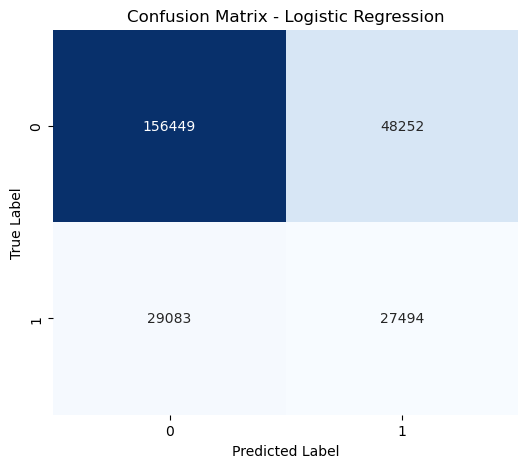

In [4]:
# 5. Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

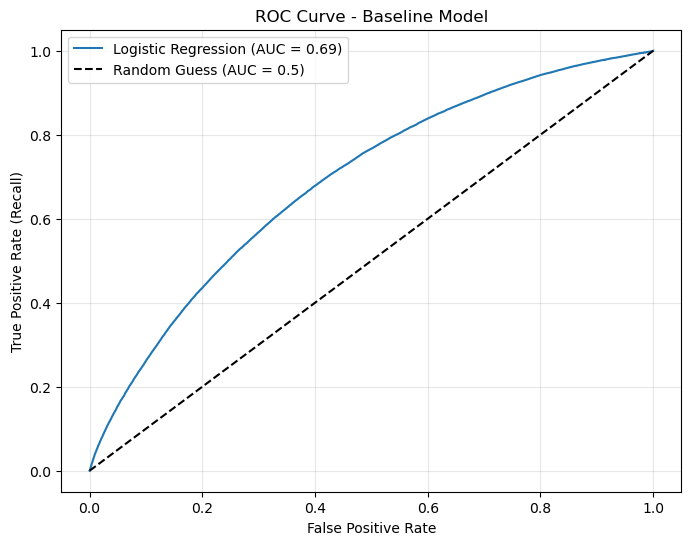

In [5]:
# 6. ROC Curve Visualization
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Baseline Model')
plt.legend()
plt.grid(alpha=0.3)
plt.show()